In [33]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [ ]:
mnist =input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
nb_classes =10

In [ ]:
X = tf.placeholder(tf.float32, [None,784])

In [23]:
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [24]:
W= tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [25]:
 hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
 cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [26]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y,1))

In [27]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [28]:
trainig_epochs =15
batch_size =100

Epoch:  0001 cost = 2.93118006
Epoch:  0002 cost = 1.13862012
Epoch:  0003 cost = 0.891094304
Epoch:  0004 cost = 0.773100892
Epoch:  0005 cost = 0.700645317
Epoch:  0006 cost = 0.650336997
Epoch:  0007 cost = 0.611981495
Epoch:  0008 cost = 0.581890238
Epoch:  0009 cost = 0.557149485
Epoch:  0010 cost = 0.536713545
Epoch:  0011 cost = 0.519267279
Epoch:  0012 cost = 0.503743298
Epoch:  0013 cost = 0.490347319
Epoch:  0014 cost = 0.478028741
Epoch:  0015 cost = 0.467715674
Accuracy:  0.8937
Label: [2]
Prediction: [2]


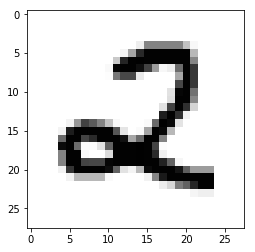

In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(trainig_epochs):
        avg_cost =0
        total_batch = int(mnist.train.num_examples /batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y: batch_ys})
            avg_cost += c /total_batch
            
        print("Epoch: ", '%04d' %(epoch+1), 'cost =', '{:.9}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images,
                                                               Y: mnist.test.labels}))    
    r = random.randint(0, mnist.test.num_examples-1)
    print("Label:",sess.run(tf.arg_max(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.arg_max(hypothesis,1),feed_dict =
                                 {X: mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys', interpolation='nearest')
    plt.show()